In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import implicit

truncated_business and truncated_review are json files that contains only business and reviews from Pittsburgh

In [2]:
basePath = os.path.dirname(os.path.abspath('truncated_business.json'))
businessURL = 'truncated_business.json'
business = pd.read_json(businessURL, orient='records', lines=True)
business = business.drop(columns=['city', 'hours', 'latitude', 'longitude', 'state'])

reviewURL = basePath + '/truncated_review_stars.json'
review = pd.read_json(reviewURL, orient='records', lines=True)


In [3]:
business.head()

,address,attributes,business_id,categories,is_open,name,neighborhood,postal_code,review_count,stars
0,209 Oakland Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",UTm5QZThPQlT35mkAcGOjg,"Flowers & Gifts, Gift Shops, Shopping",1,Maggie & Stella's Gifts,Oakland,15213,3,3.5
1,"531 Clairton Blvd, Unit 7","{'BikeParking': 'False', 'BusinessAcceptsBitco...",UmZnFzo-NK2daxkl3_Rieg,"Hair Salons, Beauty & Spas",1,Philip Pelusi,,15236,5,4.5
2,1720 Washington Rd,{'BusinessAcceptsCreditCards': 'True'},3JhKtHSmvwzGBysraUVMDg,"Professional Services, Local Services, Shippin...",1,FedEx Office Print & Ship Center,,15241,5,3.5
3,5440 Walnut St,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",f2FfutZhb4F-m1Ob0EdYaw,"Asian Fusion, Caterers, Fast Food, Chinese, Re...",1,China Palace,Shadyside,15232,110,3.0
4,4635 Centre Ave,"{'Ambience': '{'romantic': False, 'intimate': ...",qfcdMhm1Ff28JHVpHca20g,"Pizza, Restaurants",1,Pizza Bellagio,Oakland,15213,18,1.5


In [4]:
review.head(10)

,business_id,review_id,stars,user_id
0,yFumR3CWzpfvTH2FCthvVw,STiFMww2z31siPY7BWNC2g,5,TlvV-xJhmh7LCwJYXkV-cg
1,XqNDr54eLDLRfZwo4l4dVA,5um5SX-Lbgik5dwUGe2jFw,4,eG6HneK9zLcuZpVuKcsCGQ
2,0bjFYstj8USMzEV4ZQldjA,VKGvSe0SmYcFc5PqjbxLDQ,5,eG6HneK9zLcuZpVuKcsCGQ
3,q0n4I-zqiI47xispOqc1lA,M9gD64U797dfIpLA9OHYVA,5,eG6HneK9zLcuZpVuKcsCGQ
4,alG1fb1kl2vmT8s34jbbHg,eShfPWENUmZ9sP7fstPt7Q,5,eG6HneK9zLcuZpVuKcsCGQ
5,PyTHy9VPOhBCiGLsi-PA2Q,yff_3vVG6FxquxmH4V04Hg,3,AlzerMK7z84E4KU6GjPzIQ
6,zzwhN7x37nyjP0ZM8oiHmw,5KM9SvL6Tii_C2QvWQ64hQ,4,AlzerMK7z84E4KU6GjPzIQ
7,Ul6JwluSTm12PVDIqnNaTg,F3vb0OGmKwWW8ohaZarSbg,4,AlzerMK7z84E4KU6GjPzIQ
8,L95ppCbcWAt4LUWrCiEvPg,nyahh6-LJ1fiskNTwxcFsQ,4,AlzerMK7z84E4KU6GjPzIQ
9,v50-nvBCZNf7nCNbyUlQLw,zJd6NFUk7ARsWApBUzXqVQ,1,AlzerMK7z84E4KU6GjPzIQ


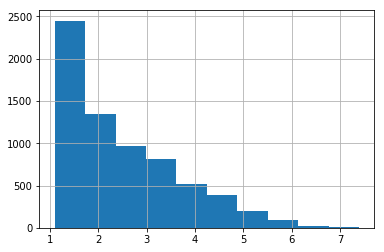

In [5]:
business['review_count'].apply(np.log).hist()
plt.show()

In [6]:
business_num = business.count()
business_num

address         6804
attributes      5980
business_id     6804
categories      6790
is_open         6804
name            6804
neighborhood    6804
postal_code     6804
review_count    6804
stars           6804
dtype: int64

In [7]:
business = business[business.review_count > 10]

In [8]:
business.count()

address         3006
attributes      2886
business_id     3006
categories      3006
is_open         3006
name            3006
neighborhood    3006
postal_code     3006
review_count    3006
stars           3006
dtype: int64

In [9]:
business = business.reset_index()

In [10]:
business.head()

,index,address,attributes,business_id,categories,is_open,name,neighborhood,postal_code,review_count,stars
0,3,5440 Walnut St,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",f2FfutZhb4F-m1Ob0EdYaw,"Asian Fusion, Caterers, Fast Food, Chinese, Re...",1,China Palace,Shadyside,15232,110,3.0
1,4,4635 Centre Ave,"{'Ambience': '{'romantic': False, 'intimate': ...",qfcdMhm1Ff28JHVpHca20g,"Pizza, Restaurants",1,Pizza Bellagio,Oakland,15213,18,1.5
2,5,5104 Butler St,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",-yuNBcDIoOzCcS4GWU_o1A,"Beauty & Spas, Shopping, Specialty Schools, Ed...",1,The Gilded Girl,Lawrenceville,15201,11,4.5
3,6,4900 Hatfield St,"{'BikeParking': 'True', 'BusinessAcceptsBitcoi...",zyaRXoJkyNd_RPPtGrmMlA,"Beauty & Spas, Hair Salons",1,Evolve Modern Hairdressing,Lawrenceville,15201,13,4.0
4,8,1931 E Carson St,{'BusinessAcceptsCreditCards': 'True'},4C9m63Xk7QVCk5ykJIPkjQ,"Local Services, Screen Printing",1,Commonwealth Press,South Side,15203,15,4.5


In [11]:
#user number
user_num = review['user_id'].nunique()
user_num

62799

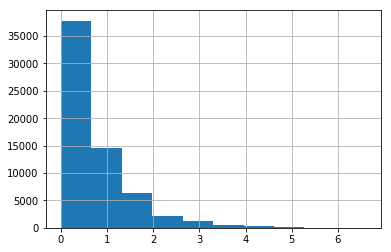

In [12]:
user_review_num = review['user_id'].value_counts()
user_review_num.apply(np.log).hist()
plt.show()

In [13]:
users = user_review_num[user_review_num > 20]

In [14]:
users.count()

1224

### So we only recommend business for these 1224 users , whose user_review_num > 20, on 3006 businesses, which received more than 10 comments

In [15]:
review.count()

business_id    201660
review_id      201660
stars          201660
user_id        201660
dtype: int64

In [16]:
review = review[review.user_id.isin(users.index.tolist()) & review.business_id.isin(business.business_id.tolist())]

In [17]:
review.count()

business_id    58313
review_id      58313
stars          58313
user_id        58313
dtype: int64

In [18]:
review = review.reset_index()

In [19]:
review.head(5)

,index,business_id,review_id,stars,user_id
0,232,1dhPgc7E7IzzpxjHM2LphQ,tILjLjnjENEmcT6LL_WvwQ,3,2dTQmS9iUhzdvhSElbkOOQ
1,233,3GuqcEYaF1d1WXcwOX5xPw,8-_TgK0o4-hXMiipbZz2tw,3,2dTQmS9iUhzdvhSElbkOOQ
2,234,OTSQq4ycH4NNhWIHcjnGaw,BDWk0O0DkBvGquOeOR0bJQ,2,2dTQmS9iUhzdvhSElbkOOQ
3,235,oeW0vIYd3rUnAPgmD4fEFg,9GNUIb2i8x7WugYg8G94sg,2,2dTQmS9iUhzdvhSElbkOOQ
4,236,cbddL2q8uRA38RwycB0FJg,8U8v5EdUcOUIM8zISpNuZw,4,2dTQmS9iUhzdvhSElbkOOQ


In [20]:
matrix = pd.DataFrame(data=None, index=users.index.tolist(), columns=business['business_id'].tolist(), dtype=np.int8)

In [21]:
print(len(matrix.values))
print(len(matrix.values[0]))

1224
3006


In [22]:
import time
print(time.time())
for index, row in review.iterrows():
    matrix.loc[row['user_id'], row['business_id']] = row['stars']
print(time.time())


1544342180.7540102
1544342199.0559008


In [23]:
print(len(matrix.values))
print(len(matrix.values[0]))

1224
3006


In [24]:
matrix = matrix.fillna(0)

## Item-based Collaborative Filtering
based on Adjusted Cosine Similarity

In [25]:
m = matrix.values

In [26]:
m_mean = m.mean(axis = 1)

In [27]:
from scipy.spatial.distance import cosine
from scipy.spatial.distance import pdist, squareform
item_mean_subtracted = m - m_mean[:, None]
similarity_matrix = 1 - squareform(pdist(item_mean_subtracted.T, 'cosine'))

In [45]:
def cal_item_based_score(ratings, sim_matrix):
    scores = []
    for i in range(len(business)):
        score = sum (ratings * sim_matrix[i]) / sum(ratings)
        if len(scores) > 10:
            top = heapq.heappop(scores)
            if score > top[1]:
                heapq.heappush(scores, (i, score))
            else:
                heapq.heappush(scores, top)
        else:
            scores.append((i, score))
    return scores

In [47]:
user_id = 20
item_based_scores = cal_item_based_score(m[user_id], similarity_matrix)
result = []
for i in range(10):
    index = heapq.heappop(item_based_scores)[0]
    result.insert(0, business.loc[index, 'name'])

In [49]:
result

["Trader Joe's",
 'Pleasure Bar and Restaurant',
 'Carnegie Library of Pittsburgh, Main Library',
 'Schenley Plaza',
 'Senator John Heinz History Center',
 'Phipps Conservatory and Botanical Gardens',
 'McCauley Celin Eyecare Associates',
 'Fuel & Fuddle',
 'Ross Park Mall',
 "Prantl's Bakery"]

Then we can use the result to get the recommendation results in decreasing order of similarity

## User-based Collaborative Filtering
based on k nearest Neighbor algorithm (KNN)

In [30]:
from sklearn.neighbors import NearestNeighbors
# def calSimilarities(userid, matrix)
neighbors = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='brute')
neighbors.fit(m)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

In [31]:
dists, indices = neighbors.kneighbors([m[user_id]], n_neighbors=10)
print(dists)
print(indices)

[[0.         0.5788593  0.70164262 0.70564961 0.7322661  0.73449233
  0.74632624 0.74699276 0.74882005 0.7517394 ]]
[[ 20   8   2   1  16  53 186  13   5  76]]


get union of business that rated by the top 10 nearest users

In [33]:
businesses = set()
count = 0
for i in indices[0]:
    for j in range(len(m[i])):
        if m[i][j] > 0:
            count += 1
            businesses.add(j)

In [34]:
def calScore(ratings, dists):
    return sum(ratings * dists) / sum (dists)

In [35]:
import heapq 
scores = []
for i in businesses:
    temp_r = []
    for j in indices[0]:
        temp_r.append(m[j][i])
    score = calScore(temp_r, dists[0])
    if len(scores) > 10:
        top = heapq.heappop(scores)
        if score > top[1]:
            heapq.heappush(scores, (i, score))
        else:
            heapq.heappush(scores, top)
    else:
        scores.append((i, score))

In [36]:
scores

[(343, 3.614741236070406),
 (352, 2.9552049739896393),
 (439, 2.236068839369739),
 (394, 2.254264612592436),
 (353, 2.865518947342474),
 (759, 2.0882389191966366),
 (444, 0.9820101304985496),
 (670, 3.2850694901361046),
 (545, 1.8470116707977118),
 (734, 2.743467480950285),
 (528, 2.510875847015843)]

In [37]:
result = []
for i in range(10):
    index = heapq.heappop(scores)[0]
    result.insert(0, business.loc[index, 'name'])

In [39]:
result

['Proper Brick Oven & Tap Room',
 'Square Cafe',
 'Hofbrauhaus Pittsburgh',
 'Conflict Kitchen',
 'Mike Feinberg',
 'NOLA',
 "Bier's Pub",
 'Everyday Noodles',
 'Kaya',
 'Eleven']

### Results from item-based filtering:
"Trader Joe's",
 'Pleasure Bar and Restaurant',
 'Carnegie Library of Pittsburgh, Main Library',
 'Schenley Plaza',
 'Senator John Heinz History Center',
 'Phipps Conservatory and Botanical Gardens',
 'McCauley Celin Eyecare Associates',
 'Fuel & Fuddle',
 'Ross Park Mall',
 "Prantl's Bakery"

### Results from user-based filtering:
'Proper Brick Oven & Tap Room',
'Square Cafe',
'Hofbrauhaus Pittsburgh',
'Conflict Kitchen',
'Mike Feinberg',
'NOLA',
"Bier's Pub",
'Everyday Noodles',
'Kaya',
'Eleven'